# Data Identification

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customers-dataset/Customers.csv


In [2]:
df = pd.read_csv("/kaggle/input/customers-dataset/Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
df.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

There are 35 nan values in Profession column. 

In [6]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

Maybe I'll fill nan values in Profession column based on their annual income. Thats why I must analyze annual income average from all of role. 

# Data Cleaning

In [8]:
df[df.isna().any(axis=1)]

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7
440,441,Female,0,57373,29,NaN,0,7
498,499,Male,95,121725,3,NaN,12,3
545,546,Female,89,107359,26,NaN,10,6
601,602,Male,61,126370,20,NaN,11,4
641,642,Male,66,121377,19,NaN,7,7


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
list_of_role = ['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing']

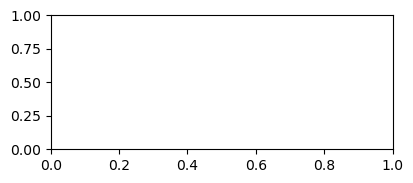

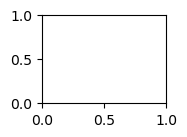

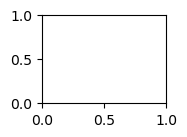

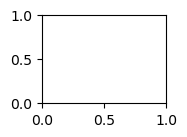

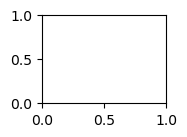

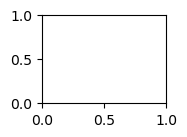

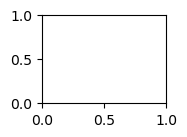

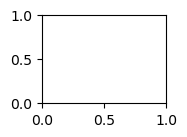

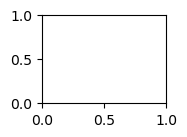

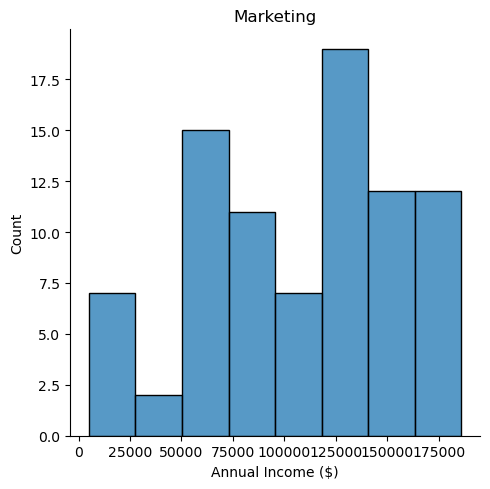

In [11]:
plt.figure(figsize = (15, 8));
number = 1
row = 4
for i in list_of_role:
    df_profession = df[df.Profession==i]
    plt.subplot(row, 3, number)
    sns.displot(df_profession['Annual Income ($)'])
    number += 1
    plt.title(i)
    plt.tight_layout();

In [12]:
x = 1
for i in list_of_role:
    df_profession = df[df.Profession==i]
    average_salary = df_profession['Annual Income ($)'].mean()
    print(x, 'Annual Income average of', i, 'is', round(average_salary, 2))
    x += 1

1 Annual Income average of Healthcare is 112574.04
2 Annual Income average of Engineer is 111161.24
3 Annual Income average of Lawyer is 110995.84
4 Annual Income average of Entertainment is 110650.33
5 Annual Income average of Artist is 108776.58
6 Annual Income average of Executive is 113770.13
7 Annual Income average of Doctor is 111573.22
8 Annual Income average of Homemaker is 108758.62
9 Annual Income average of Marketing is 107994.21


Annual income average of professions is almost same. There are not significant different. 

In [13]:
x = 1
for i in list_of_role:
    df_profession = df[df.Profession==i]
    average_salary = df_profession['Spending Score (1-100)'].mean()
    print(x, 'Spending score average of', i, 'is', round(average_salary, 2))
    x += 1

1 Spending score average of Healthcare is 50.52
2 Spending score average of Engineer is 48.97
3 Spending score average of Lawyer is 48.86
4 Spending score average of Entertainment is 52.94
5 Spending score average of Artist is 52.68
6 Spending score average of Executive is 49.9
7 Spending score average of Doctor is 51.9
8 Spending score average of Homemaker is 46.38
9 Spending score average of Marketing is 48.72


Their spending score are also not significant different.

In [14]:
x = 1
for i in list_of_role:
    df_profession = df[df.Profession==i]
    average_salary = df_profession.Age.mean()
    print(x, 'Age average of', i, 'is', round(average_salary, 2))
    x += 1

1 Age average of Healthcare is 47.84
2 Age average of Engineer is 55.09
3 Age average of Lawyer is 47.75
4 Age average of Entertainment is 51.16
5 Age average of Artist is 49.0
6 Age average of Executive is 46.6
7 Age average of Doctor is 46.62
8 Age average of Homemaker is 45.37
9 Age average of Marketing is 45.82


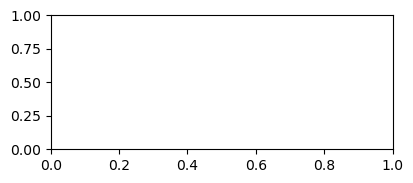

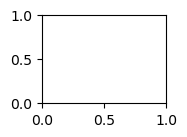

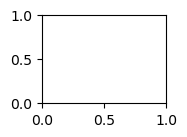

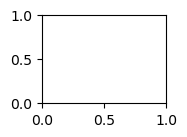

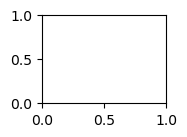

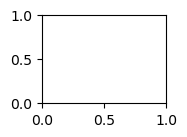

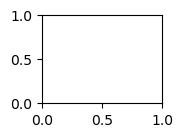

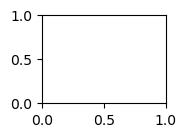

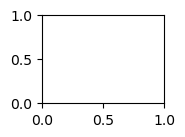

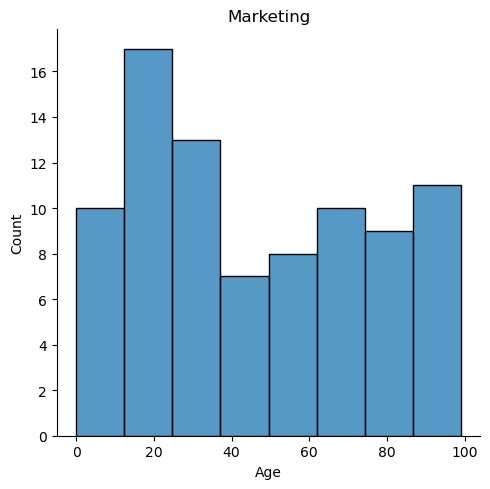

In [15]:
import sys
plt.figure(figsize = (15, 8));
number = 1
row = 4
for i in list_of_role:
    df_profession = df[df.Profession==i]
    plt.subplot(row, 3, number)
    sns.displot(df_profession.Age)
    number += 1
    plt.title(i)
    plt.tight_layout();

In [16]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,2000.0,NaN,NaN,NaN,1000.5,577.494589,1.0,500.75,1000.5,1500.25,2000.0
Gender,2000,2,Female,1186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2000.0,NaN,NaN,NaN,48.96,28.429747,0.0,25.0,48.0,73.0,99.0
Annual Income ($),2000.0,NaN,NaN,NaN,110731.8215,45739.536688,0.0,74572.0,110045.0,149092.75,189974.0
Spending Score (1-100),2000.0,NaN,NaN,NaN,50.9625,27.934661,0.0,28.0,50.0,75.0,100.0
Profession,1965,9,Artist,612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work Experience,2000.0,NaN,NaN,NaN,4.1025,3.922204,0.0,1.0,3.0,7.0,17.0
Family Size,2000.0,NaN,NaN,NaN,3.7685,1.970749,1.0,2.0,4.0,5.0,9.0


In [17]:
x = 1
for i in list_of_role:
    df_profession = df[df.Profession==i]
    average_salary = df_profession['Work Experience'].mean()
    print(x, 'Work Experience average of', i, 'is', round(average_salary, 2))
    x += 1

1 Work Experience average of Healthcare is 4.0
2 Work Experience average of Engineer is 3.96
3 Work Experience average of Lawyer is 3.53
4 Work Experience average of Entertainment is 3.5
5 Work Experience average of Artist is 4.22
6 Work Experience average of Executive is 4.25
7 Work Experience average of Doctor is 4.3
8 Work Experience average of Homemaker is 6.13
9 Work Experience average of Marketing is 4.31


In [18]:
x = 1
for i in list_of_role:
    df_profession = df[df.Profession==i]
    average_salary = df_profession['Family Size'].mean()
    print(x, 'Family size average of', i, 'is', round(average_salary, 2))
    x += 1

1 Family size average of Healthcare is 3.91
2 Family size average of Engineer is 3.58
3 Family size average of Lawyer is 3.62
4 Family size average of Entertainment is 3.89
5 Family size average of Artist is 3.65
6 Family size average of Executive is 3.97
7 Family size average of Doctor is 3.67
8 Family size average of Homemaker is 4.05
9 Family size average of Marketing is 3.73


Their family size based on their profession is almost same.

In [19]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')

When all of aspect (age, annual income, spending score, work experience, and family size) is not significant different, I'll fill nan values in Profession column with the most profession of customers on dataset.

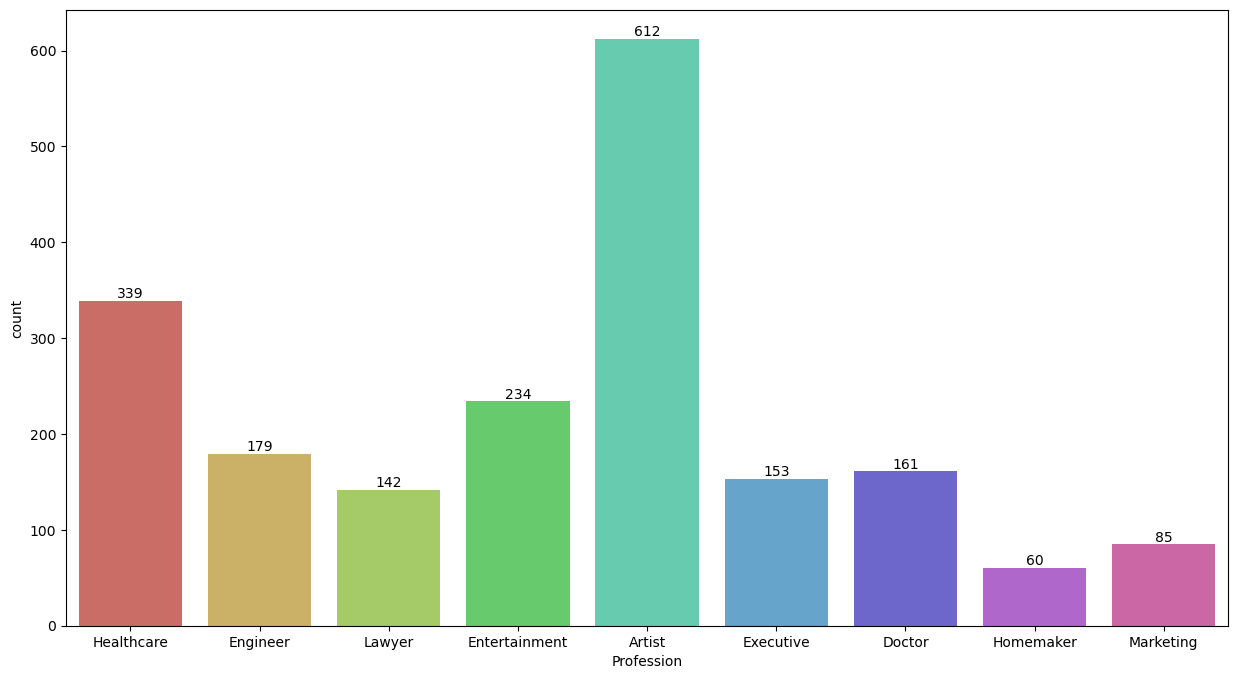

In [20]:
plt.figure(figsize = (15, 8))
ax = sns.countplot(x='Profession', data=df, palette="hls")
ax.bar_label(ax.containers[0]);

In [21]:
df.Profession = df.Profession.fillna(df.Profession.mode()[0])

In [22]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [23]:
df.nunique()

CustomerID                2000
Gender                       2
Age                        100
Annual Income ($)         1786
Spending Score (1-100)     101
Profession                   9
Work Experience             18
Family Size                  9
dtype: int64

Delete CustomerID because it has unique values as much as data rows 

In [24]:
del df['CustomerID']

# EDA

In [25]:
numeric_columns = df.select_dtypes(exclude="object").columns.tolist()
numeric_columns

['Age',
 'Annual Income ($)',
 'Spending Score (1-100)',
 'Work Experience',
 'Family Size']

In [26]:
categoric_columns = df.select_dtypes(include="object").columns.tolist()
categoric_columns

['Gender', 'Profession']

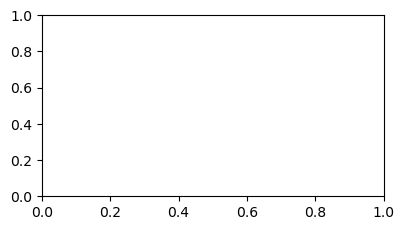

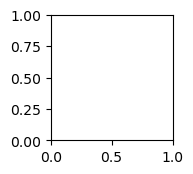

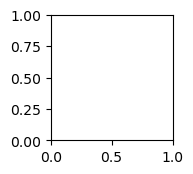

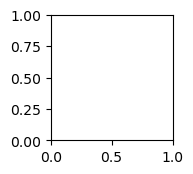

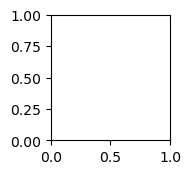

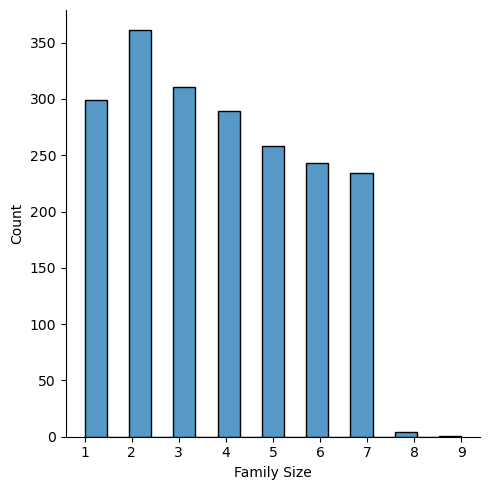

In [27]:
plt.figure(figsize = (15, 8));
number = 1
row = 3
for i in numeric_columns:
    plt.subplot(row, 3, number)
    sns.displot(df[i])
    number += 1
    plt.tight_layout();

Age, Annual Income, and Spending Score look like normal distribution. Work Experience has positive skew distribution.

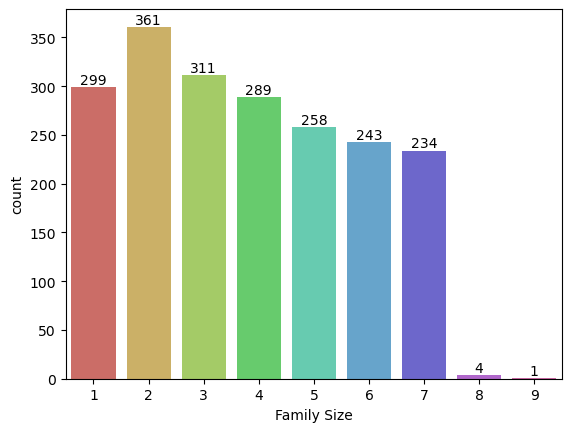

In [28]:
ax = sns.countplot(x='Family Size', data=df, palette="hls")
ax.bar_label(ax.containers[0]);

Customers has different family size and the most family size that customers have is only 2.

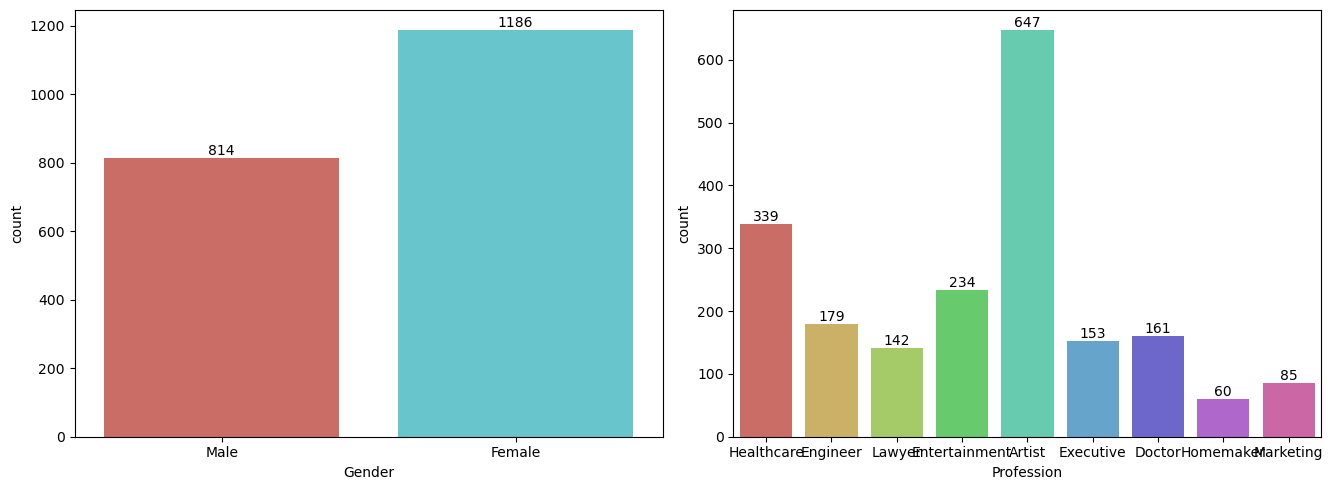

In [29]:
plt.figure(figsize = (20, 5))
number = 1
row = 1
for i in categoric_columns:
    plt.subplot(row, 3, number)
    ax = sns.countplot(x=i, data=df, palette="hls")
    ax.bar_label(ax.containers[0]);
    number += 1
    plt.tight_layout()

The most customers are female and the most customers are from artist role. The lowest customers are from homemaker role.

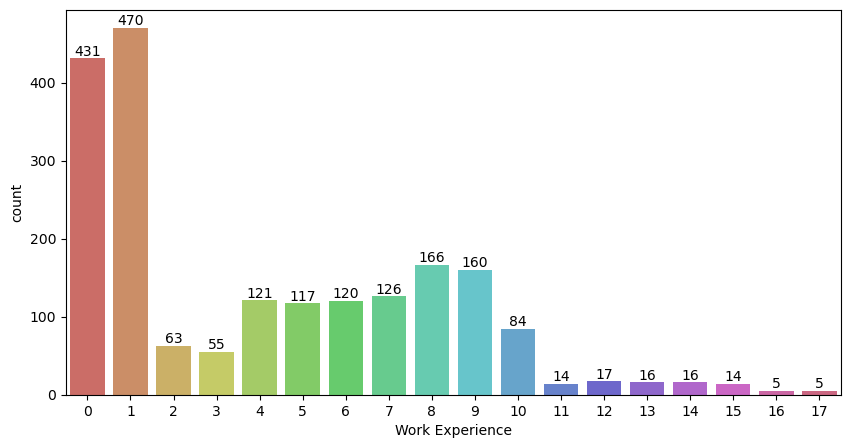

In [30]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x='Work Experience', data=df, palette="hls")
ax.bar_label(ax.containers[0]);

The most work experience of customers in dataset is 1 year and 0 year experience. 

In [31]:
df.to_csv("Shop Customer Analysis.csv", index=False)